In [73]:
import numpy as np
from matplotlib import pyplot as plt
from utils import *

## Load Processed Data

In [74]:
x, y, xtest, ytest, windows_per_machine, true = np.load('data/sequence data.npy', allow_pickle=True)

## Attention Mechanism + LSTM Model

In [75]:
import tensorflow as tf
from keras import layers
from keras import callbacks
from keras.models import Model
from sklearn.model_selection import train_test_split

In [76]:
input_sequence = layers.Input(shape=(30, 17))

lstm_output1 = layers.LSTM(units=64, return_sequences=True, activation='tanh')(input_sequence)
attention_output = layers.MultiHeadAttention(num_heads=8, key_dim=96)(lstm_output1, lstm_output1)
attention_output = layers.GlobalAveragePooling1D()(attention_output)
output = layers.Dense(units=1)(attention_output)
model = Model(inputs=input_sequence, outputs=output)

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

2023-12-13 02:37:32.915982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-13 02:37:32.916653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-13 02:37:32.917320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

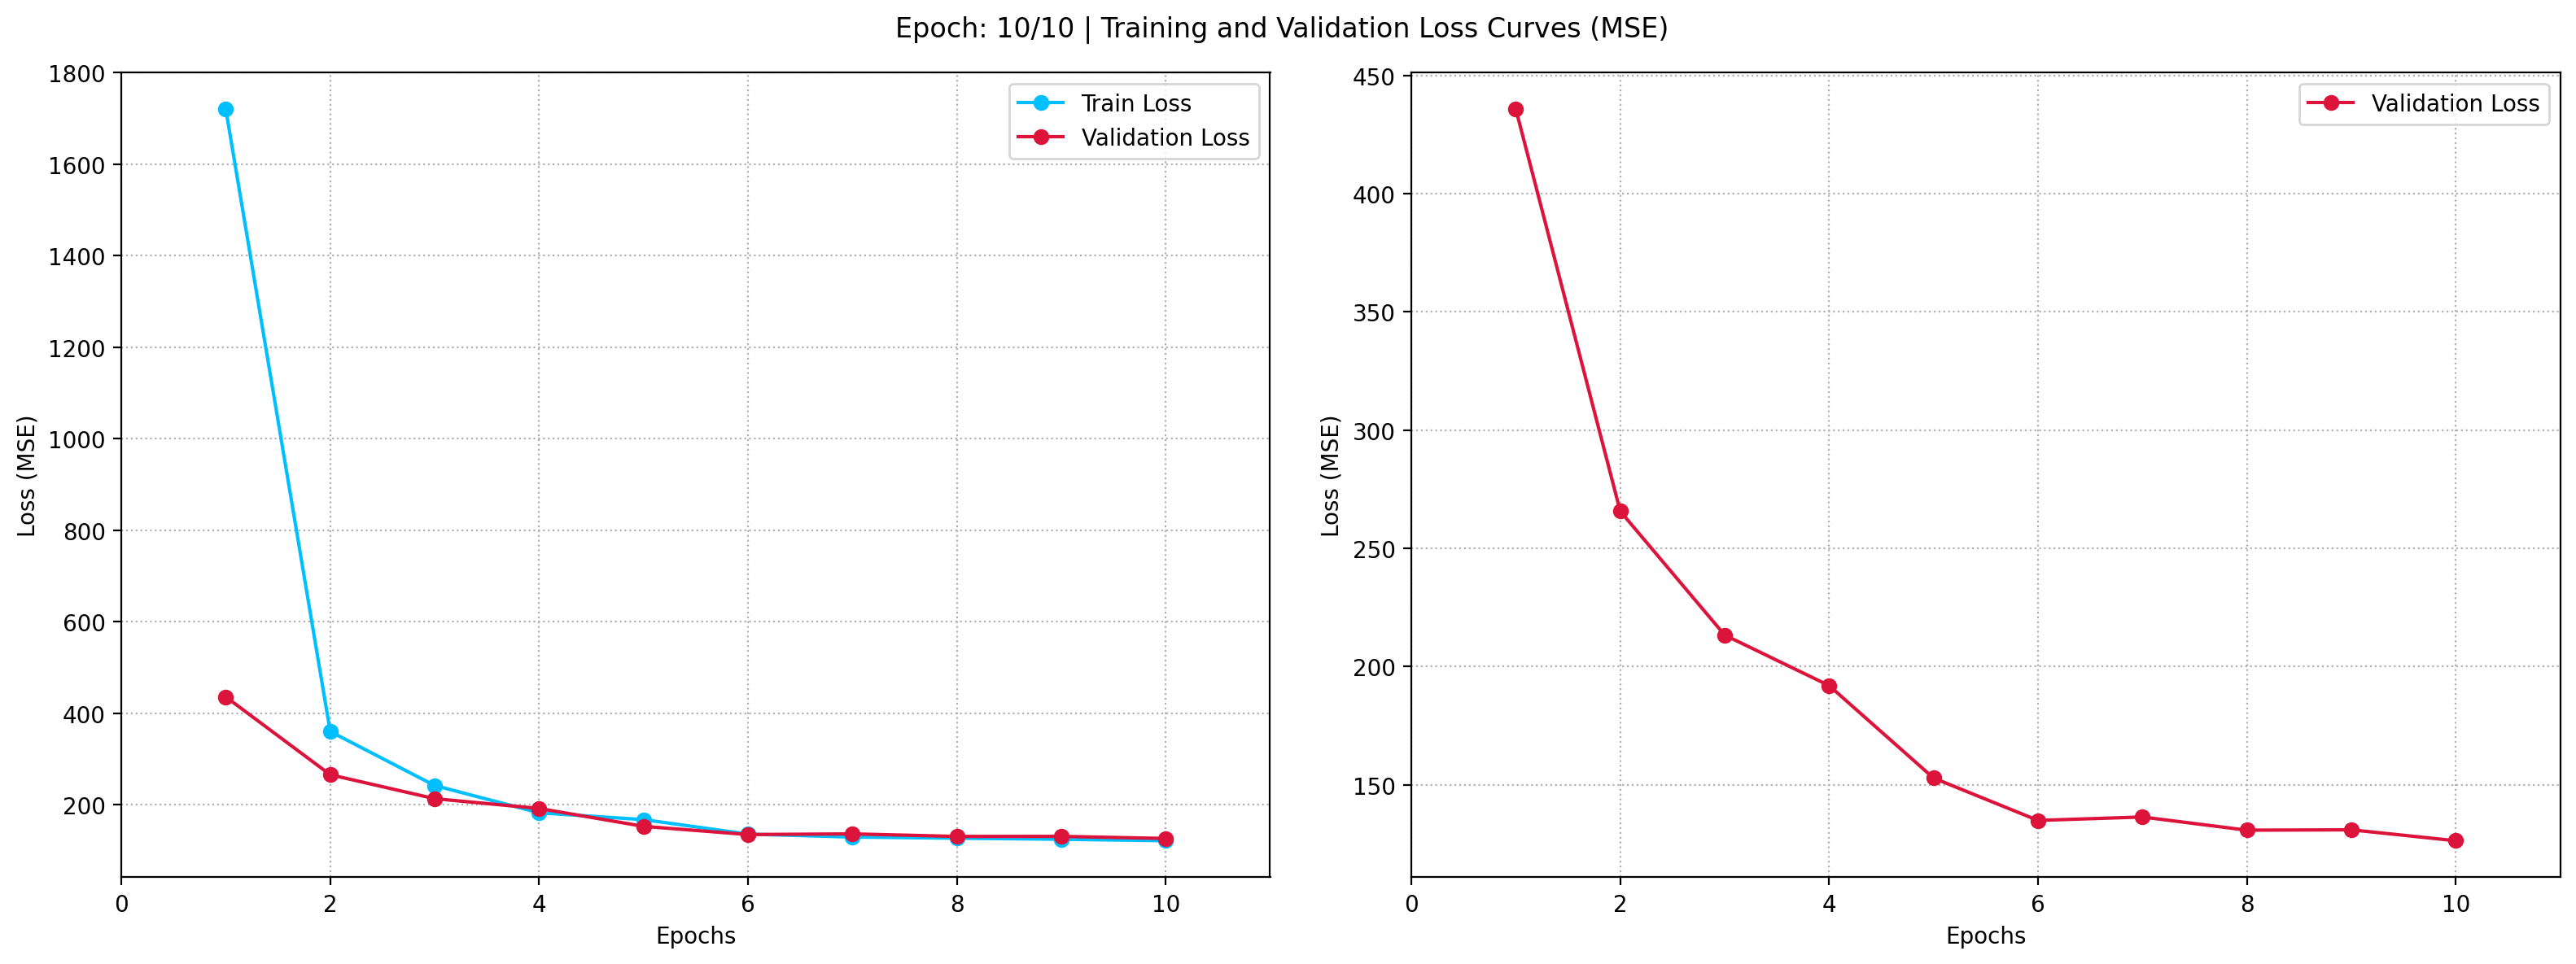

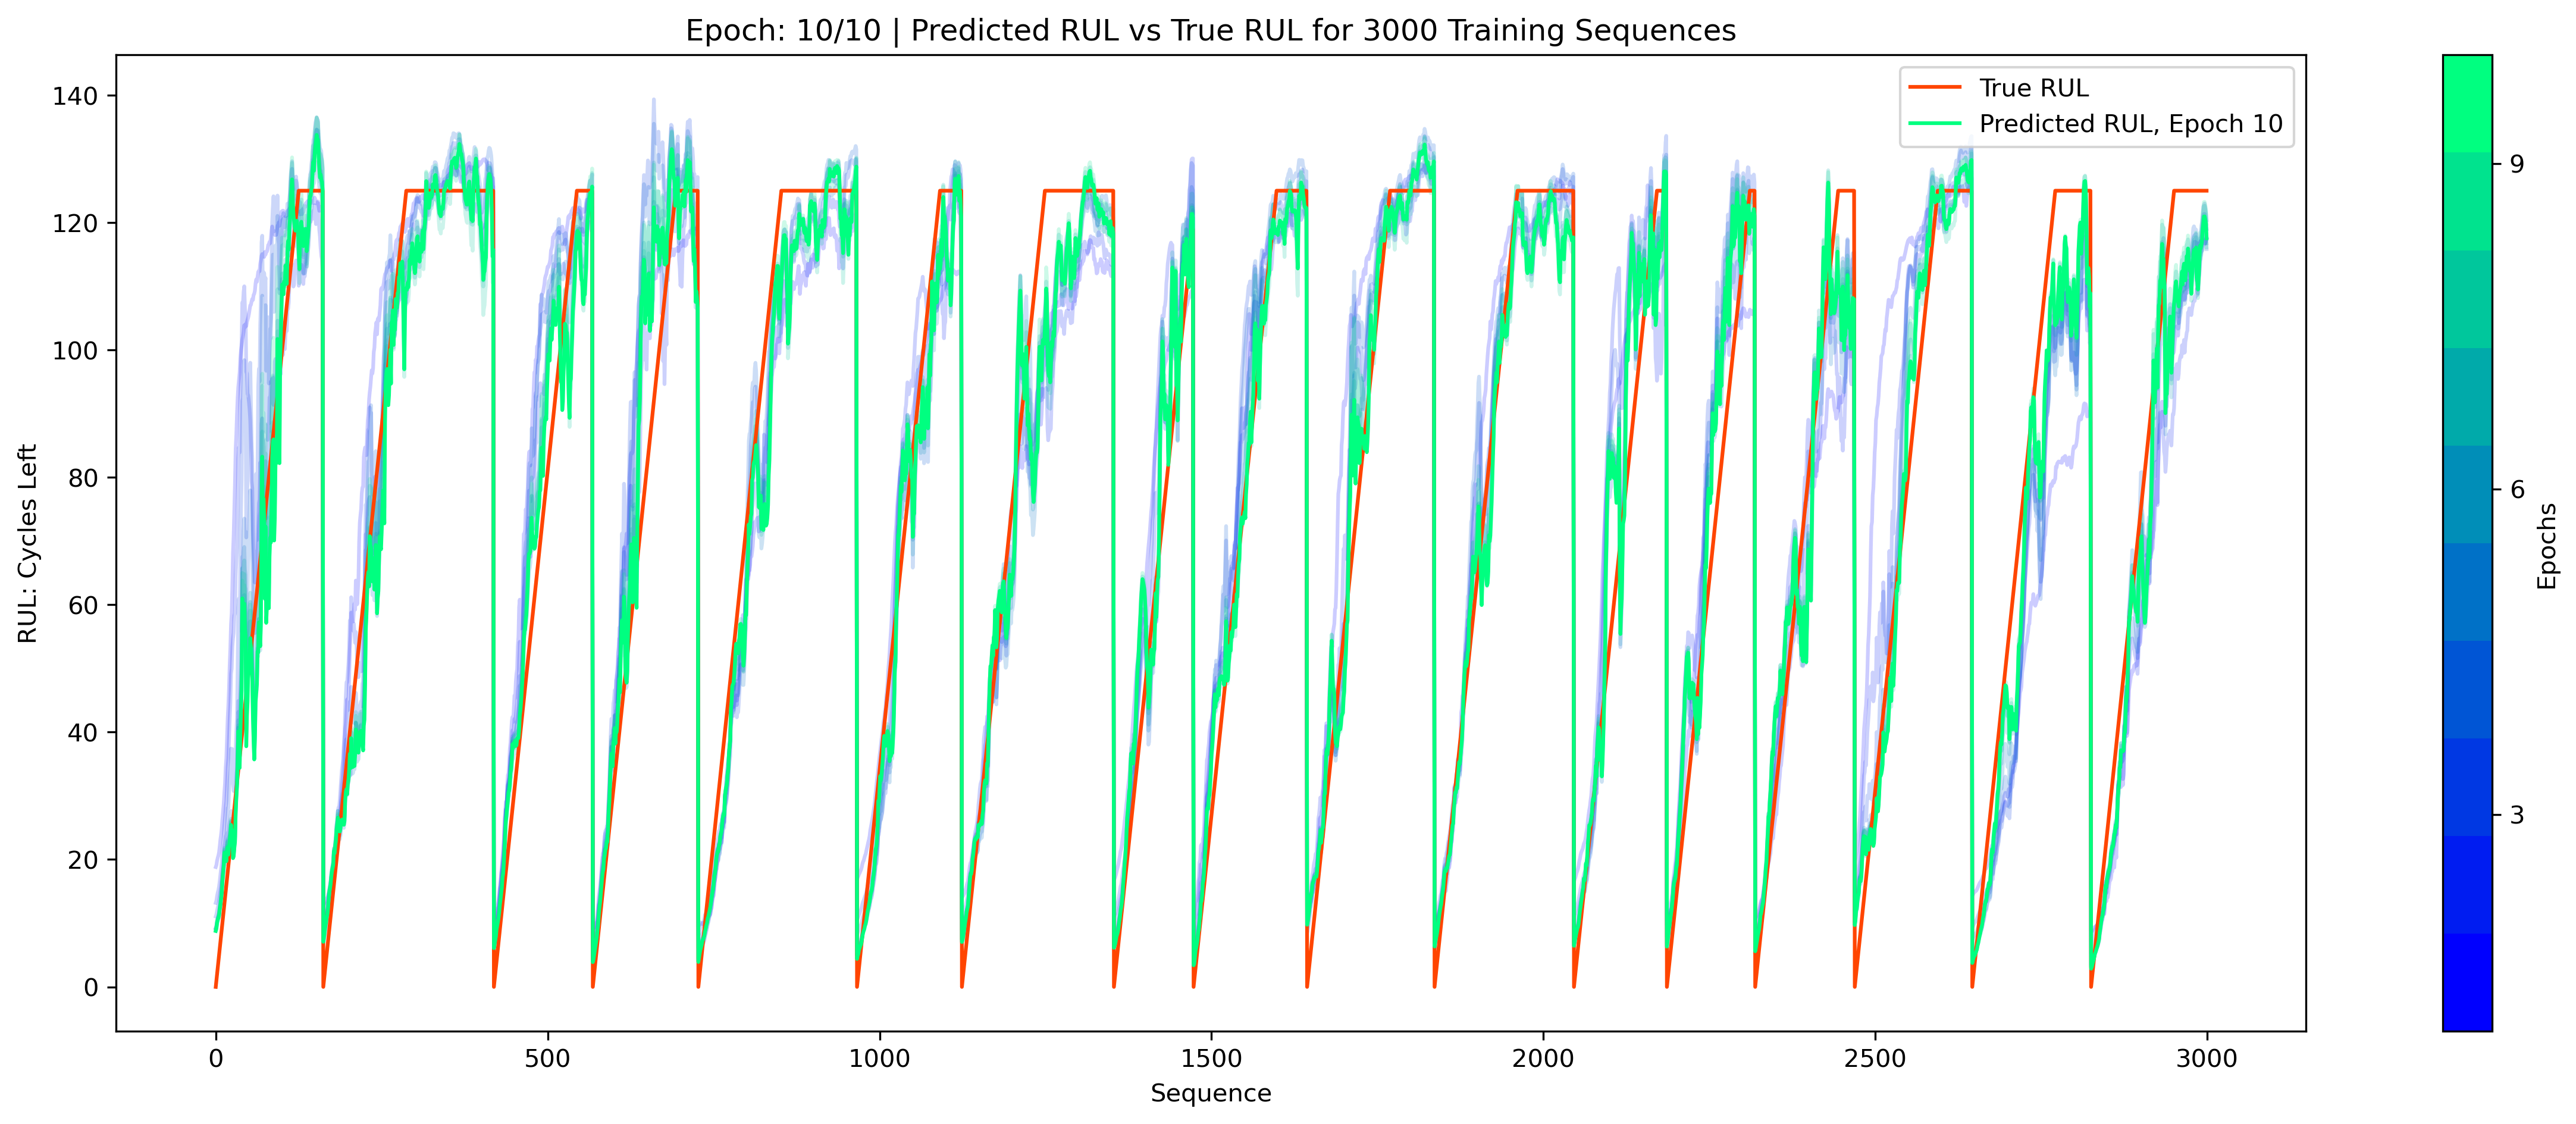


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10


2023-12-13 02:37:33.584344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-13 02:37:33.585010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-13 02:37:33.585671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/94 [====>.........................] - ETA: 0s

2023-12-13 02:37:40.825661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-13 02:37:40.826268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-13 02:37:40.827095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

94/94 [==============================] - 1s 7ms/step
111/111 - 8s - loss: 1720.5862 - val_loss: 435.7990 - lr: 0.0010 - 8s/epoch - 76ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
94/94 [==============================] - 1s 7ms/step
111/111 - 8s - loss: 360.1680 - val_loss: 265.6651 - lr: 0.0010 - 8s/epoch - 68ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
94/94 [==============================] - 1s 8ms/step
111/111 - 8s - loss: 242.0822 - val_loss: 213.2769 - lr: 0.0010 - 8s/epoch - 70ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
94/94 [==============================] - 1s 7ms/step
111/111 - 8s - loss: 182.3920 - val_loss: 191.9016 - lr: 0.0010 - 8s/epoch - 69ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/10
94/94 [==============================] - 1s 8ms/step
111/111 - 8s - loss: 1

In [77]:
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, shuffle=True)

lr_schedule = callbacks.LearningRateScheduler(lambda epoch, lr: lr/10 if epoch == 5 else lr, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

loss_curve = LossCurve(*plt.subplots(ncols=2, nrows=1, figsize=(16, 6), dpi=200))
rul_graph = RULGraph(fig=plt.figure(figsize=(16, 6), dpi=300), ax=plt.axes(), x=x, y=y, time_points=3000)

history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xval, yval), callbacks=[lr_schedule, early_stop, loss_curve, rul_graph], batch_size=128, verbose=2)

In [85]:
xtest.shape

(497, 30, 17)

In [81]:
# performance only using average of test predictions per engine
mean_predictions = metrics(model=model, xtest=xtest, true=true, y_per_engine=windows_per_machine, mean_metrics=True)

16/16 [==============================] - 0s 8ms/step
MSE:  250.37406800203513
RMSE:  15.823212948135254
MAE:  12.558448305130005
R2:  0.855012753712246


In [82]:
# performance only using the last test record per engine
last_predictions = metrics(model=model, xtest=xtest, true=true, y_per_engine=windows_per_machine, mean_metrics=False)

16/16 [==============================] - 0s 7ms/step
MSE (Taking only last sample):  256.6014616589314
RMSE (Taking only last sample):  16.018784649870643
MAE (Taking only last sample):  12.612115535736084
R2 (Taking only last sample):  0.8514065788992223


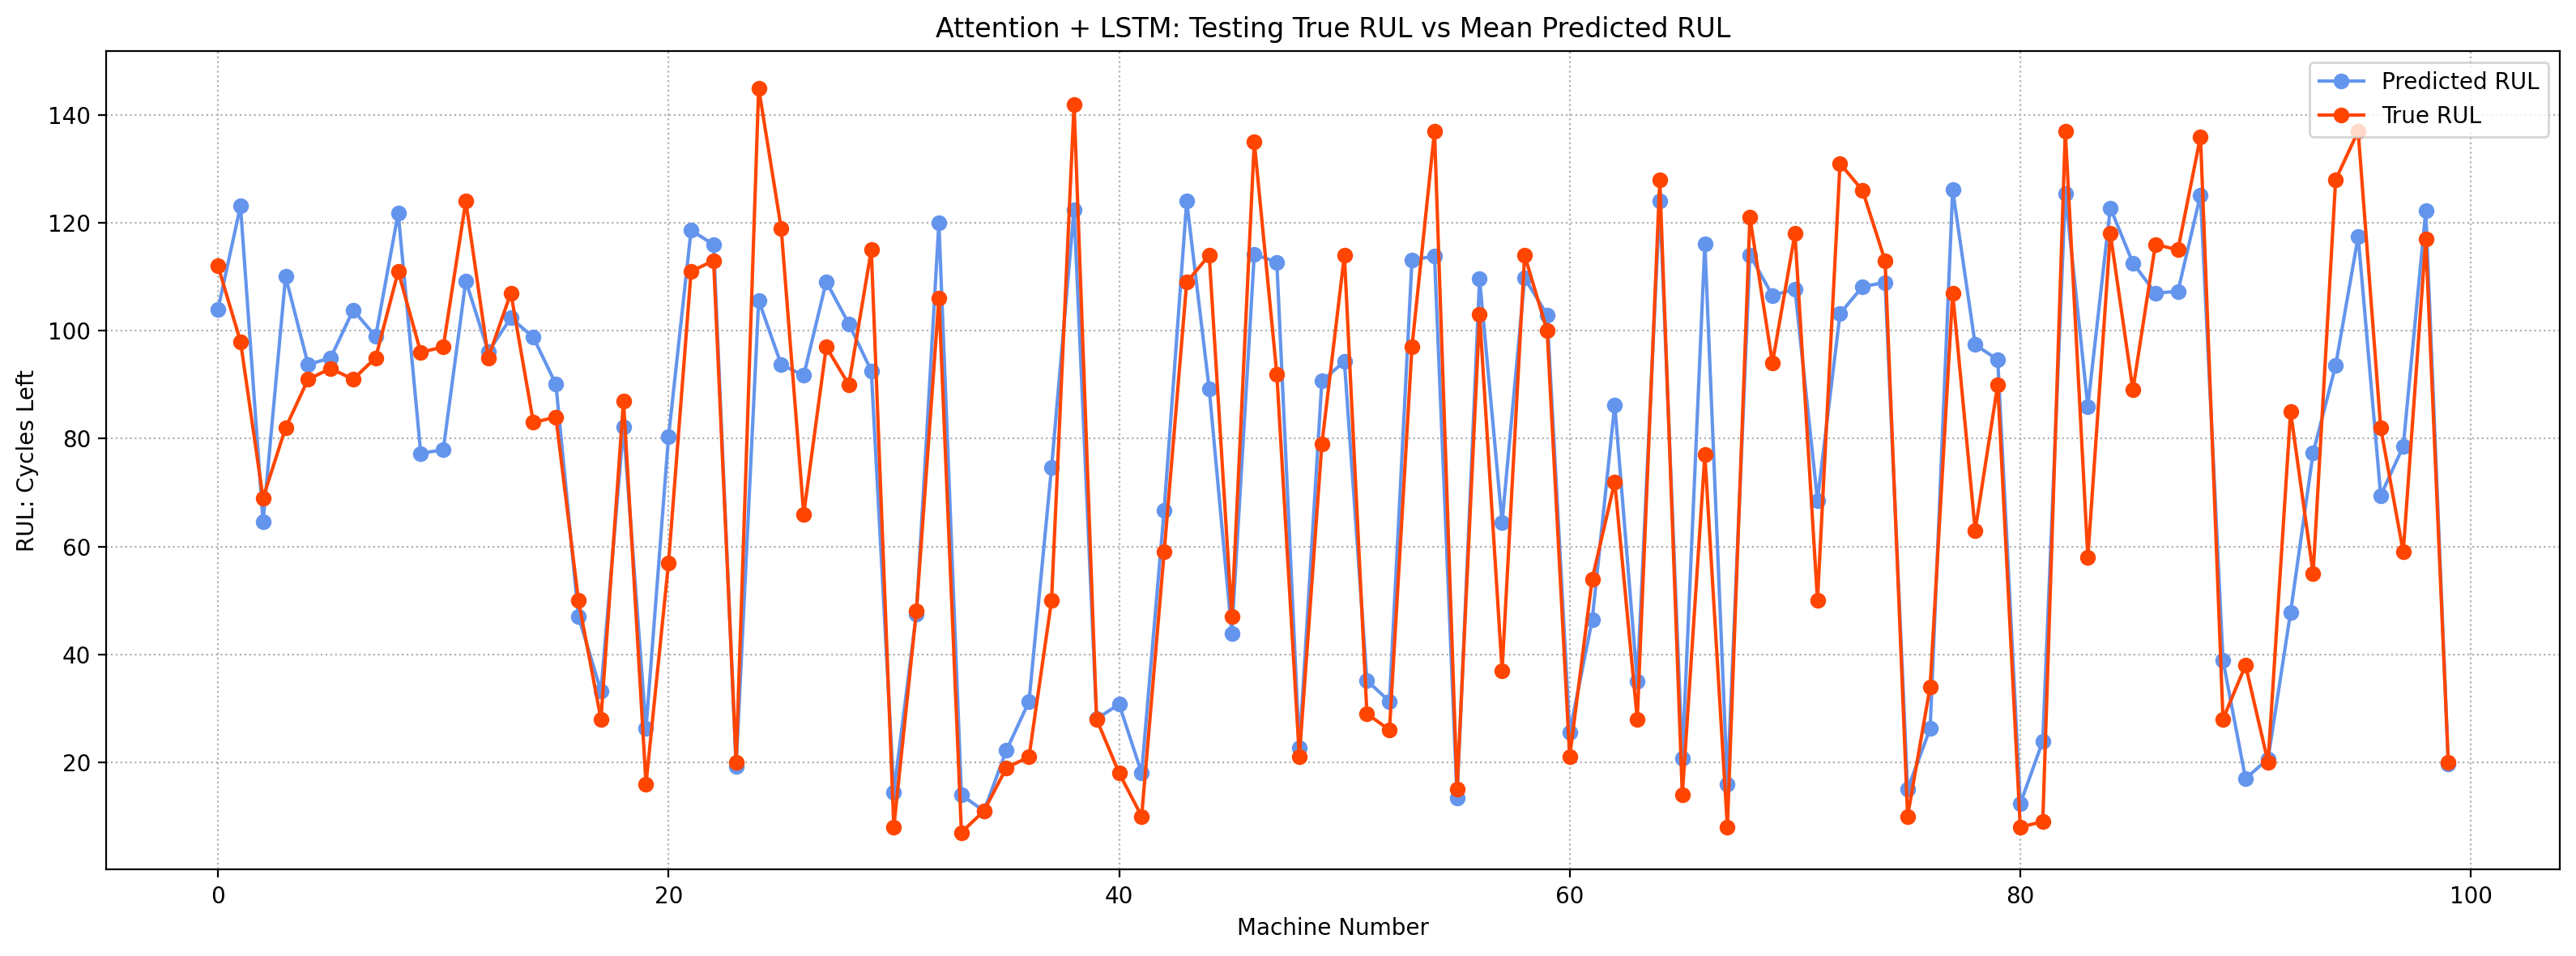

In [83]:
fig, ax = test_plot(model_name='Attention + LSTM', predictions=mean_predictions, true=true, mean_predictions=True)